# First Prototype

# Aim 1: `To make a model that can detect sign language and convert it to text`

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import plot_model

In [3]:
train_path = "/content/sign_mnist_train.csv"
test_path = "/content/sign_mnist_test.csv"
NO_CLASSES = 26

In [4]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [12]:
train.isnull().sum()

,0
label,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel780,0
pixel781,0
pixel782,0
pixel783,0


In [13]:
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [14]:
x_train = np.array(train.drop(columns=['label']))
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_train = x_train.astype("float32") / 255.0

y_train = np.array(train['label'])

x_test = np.array(test.drop(columns=['label']))
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test = x_test.astype('float32') / 255.0

y_test = np.array(test['label'])

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


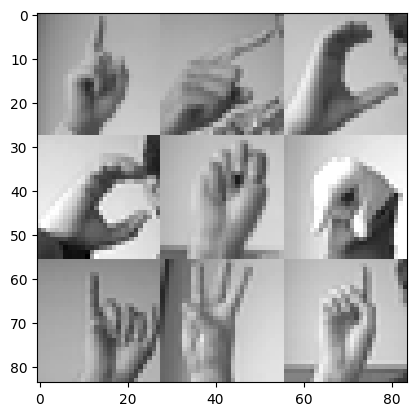

In [24]:
images = x_train[:9]

images = images.reshape(3, 3, 28, 28)

images = images.transpose(0, 2, 1, 3)

grid_image = images.reshape(3 * 28, 3 * 28)

plt.imshow(grid_image, cmap='gray')


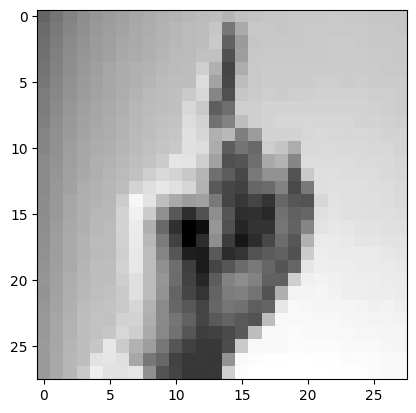

In [28]:
plt.imshow(x_train[0], cmap='gray')

In [31]:
model1 = Sequential()

model1.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1), use_bias=True))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(26, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,770 (170.98 KB)

 Trainable params: 43,770 (170.98 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
model1.fit(x_train, y_train, epochs=10, validation_data=[x_test, y_test])

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step - accuracy: 0.1449 - loss: 2.7908 - val_accuracy: 0.5743 - val_loss: 1.2789
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.6669 - loss: 0.9320 - val_accuracy: 0.7112 - val_loss: 0.8548
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.8344 - loss: 0.4590 - val_accuracy: 0.8001 - val_loss: 0.6544
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.9051 - loss: 0.2622 - val_accuracy: 0.8387 - val_loss: 0.5905
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.9431 - loss: 0.1609 - val_accuracy: 0.8274 - val_loss: 0.7346
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.9615 - loss: 0.1159 - val_accuracy: 0.8206 - val_loss: 0.7505
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.9745 - loss: 0.0738 - val_accuracy: 0.8409 - val_loss: 0.7610
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - accuracy: 0.9816 - loss: 0.0570 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


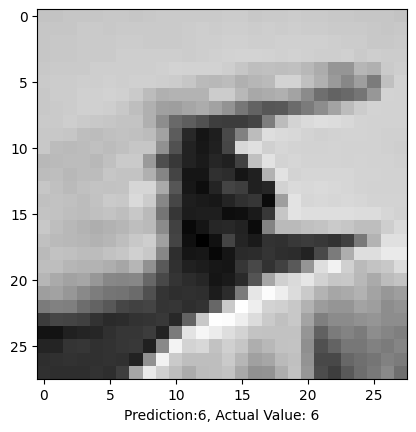

In [39]:
test_Img = x_test[0]
predict = model1.predict(test_Img.reshape(-1, 28, 28, 1))

plt.imshow(test_Img, cmap='gray')
plt.xlabel(f"Prediction:{np.argmax(predict)}, Actual Value: {y_test[0]}")
plt.show()

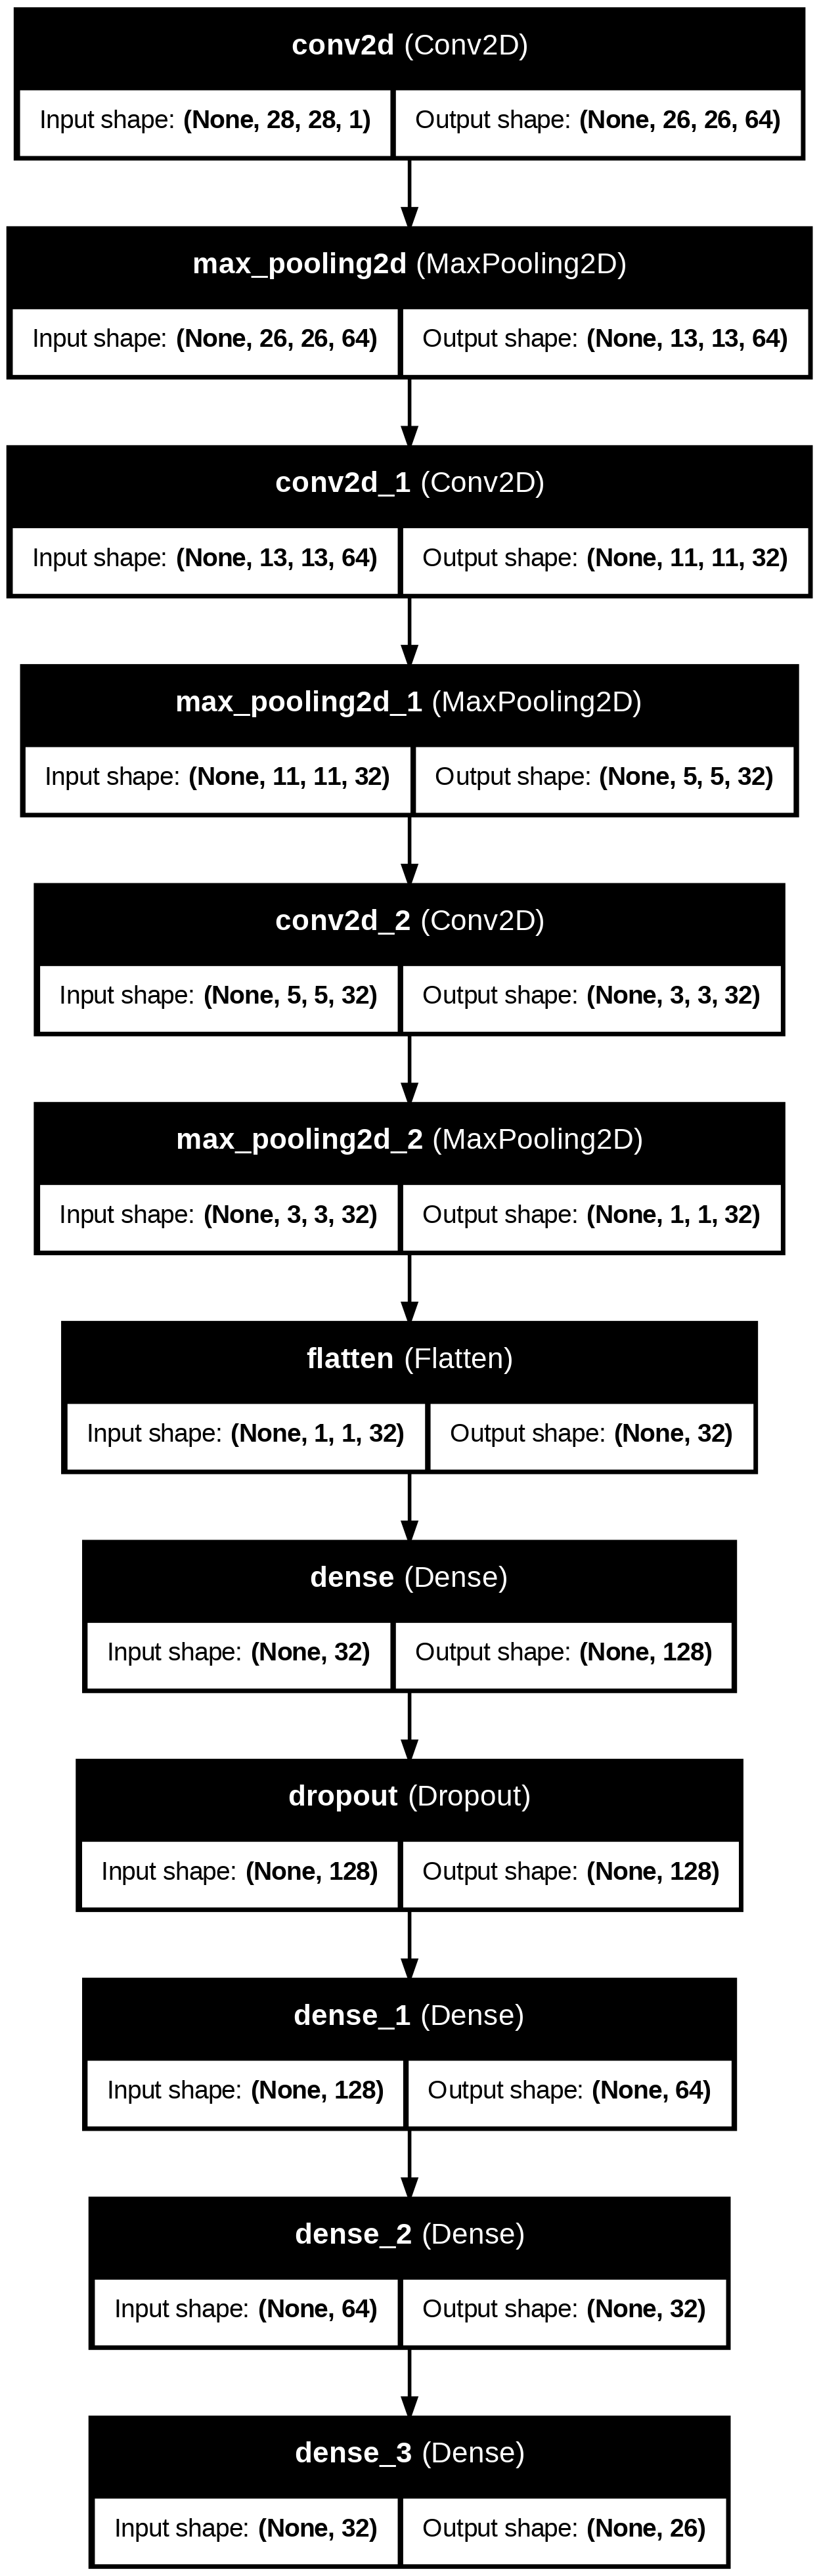

<Figure size 1000x1000 with 0 Axes>

In [47]:
from IPython.display import Image, display

plt.figure(figsize=(10, 10))
img = plot_model(model1, to_file='model1.png', show_shapes=True, show_layer_names=True, rankdir="TB")
display(Image('model1.png'))

# Aim 2 : `To improve the test accuracy while keeping the train accuracy constant`

### Insights of AIM 1:
1. **Bad generalization.**
2. **Dropout** is after only the first Convolution layer. Maybe after adding the droput after every conv2d layer, better generalization can be achieved
3. **Model Structure** - The feature map size is getting to small. For a 28x28 image, after 3 maxpool2d layers, each reducing the image by half, spatial dims are 28 -> 13, then 13 -> 5 after the second maxpool2d, then 5 -> 2 after third. Thtas very small.
4. **Global Pooling** instead of Flatten layer can also be used.
5. The dense layers for such small datat may be too large, maybe putting in dropout after every layer to stabilize the effect can also improve the accuracy.
6. Using L2 layers may improve the situation but I want to keep that for last.
7. the learning rate may be too high because i saw the models accuracy fluctuatin while train after the thrid or fourth epoch. Maybe setting it to 0.001 may help but I'll have to increase the no of epochs that will increase the train time.
8. To solve this problem [7] I can use batch normalization after every layer of convolution that allows higher learning rates which could in turn reduce overfitting.
9. Just for safety let me add early stopping too. (Not trying to be desperate, let's just play a safe and a clean game)

### Solutions for AIM 1:

1. Perplexity tells me to use spatial drop, let me try it out, idk what it is in mathematics though but lets see.
2. New model arch for convolution:
  - `Conv1 -> Dropout1 -> BN1 -> Conv2 -> Drop2 -> BN2 -> Conv3 -> Drop3 -> BN3`. (keeping in mind to reduce the MaxPooling2D)
      - Fix: Using `Batchnorm -> Conv2D -> MaxPool` arch.
      - Removing unnecessary Dense layers as they are creating a bottle neck. its happening because prev_layer neurons > current layer neurons.


In [54]:
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Activation
from tensorflow.keras.regularizers import l2

model2 = Sequential()

model2.add(Conv2D(64, kernel_size=(5,5), padding='same', input_shape=(28, 28, 1)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, kernel_size=(3,3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, kernel_size=(3,3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(GlobalAveragePooling2D())

model2.add(Dense(128, kernel_regularizer=l2(0.001) , activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(26, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model2.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
model2.fit(x_train, y_train, epochs=10, validation_data=[x_test, y_test])

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 76s 84ms/step - accuracy: 0.4699 - loss: 1.9477 - val_accuracy: 0.5453 - val_loss: 1.8422
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.9678 - loss: 0.1976 - val_accuracy: 0.7114 - val_loss: 0.9823
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.9879 - loss: 0.0937 - val_accuracy: 0.1960 - val_loss: 9.8297
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.9896 - loss: 0.0724 - val_accuracy: 0.8537 - val_loss: 0.4798
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 84s 84ms/step - accuracy: 0.9923 - loss: 0.0541 - val_accuracy: 0.7605 - val_loss: 0.8461
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 79s 80ms/step - accuracy: 0.9949 - loss: 0.0409 - val_accuracy: 0.3102 - val_loss: 5.9526
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 84s 82ms/step - accuracy: 0.9906 - loss: 0.0499 - val_accuracy: 0.7936 - val_loss: 0.8145
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 80s 80ms/step - accuracy: 0.9957 - loss: 0.0338 - 